In [163]:
import agents
import game
import mechanisms

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch

In [164]:
import importlib
importlib.reload(agents)
importlib.reload(game)
importlib.reload(mechanisms)

<module 'mechanisms' from 'C:\\Users\\billz\\PycharmProjects\\CS_281\\Finding_Friends\\mechanisms.py'>

In [165]:
NUM_PLAYERS = 4
BASE_LVL = 0
LVL_CAP = 10
WIN_PROB = 1.0
SAMPLE = mechanisms.sample_bernoulli

# skill_levels = np.array([1, 2, 3, 4, 5])
skill_levels = np.random.randint(1, 5, size=NUM_PLAYERS)
skill_levels = skill_levels / np.sum(skill_levels)
print(skill_levels)

ff_mech = mechanisms.Baseline_Mechanism(num_players=NUM_PLAYERS, sample=SAMPLE, p=WIN_PROB)
# ff_mech = mechanisms.Skill_Mechanism(num_players=NUM_PLAYERS, sample=SAMPLE, skill_levels=skill_levels)

ff_agents = [agents.Basic_Agent(i, BASE_LVL) for i in range(NUM_PLAYERS - 1)]
# ff_agents.append(agents.Lowest_Level_Agent(NUM_PLAYERS - 2, BASE_LVL))
# ff_agents.append(agents.Lowest_Level_Agent(NUM_PLAYERS - 1, BASE_LVL))
# ff_agents.append(agents.Beta_Binomial_Agent(NUM_PLAYERS - 1, BASE_LVL, skill=skill_levels[NUM_PLAYERS - 1], priors=(2, 5)))
ff_agents.append(agents.Q_Agent(NUM_PLAYERS - 1, BASE_LVL, output_dim=ff_mech.output_dim()))

ff_game = game.Game(players=ff_agents, mechanism=ff_mech, cap=LVL_CAP, logging_level='DEBUG')

[0.3 0.3 0.1 0.3]


In [166]:
from tqdm import tqdm

NUM_TRIALS = 500000
results = []

In [167]:
for i in tqdm(range(NUM_TRIALS)):
    ff_game.play()
    results.append(ff_game.levels)
    ff_game.reset()

results = np.array(results)

100%|██████████| 500000/500000 [22:23<00:00, 372.17it/s]  


In [168]:
ff_agents[-1].q

{((2, 1, 3, 0), 2): -0.6293414359736839,
 ((5, 2, 6, 1), 0): -0.8007471395830297,
 ((7, 5, 8, 2), 1): -0.954723819760792,
 ((9, 8, 9, 4), 1): -1.0,
 ((1, 0, 1, 0), 2): -0.3050428336206793,
 ((2, 3, 3, 2), 2): -0.33964213489165623,
 ((4, 5, 6, 3), 2): -0.8043788677417116,
 ((0, 0, 0, 0), 1): -0.14737808046818524,
 ((2, 4, 1, 1), 1): -0.5089235658029192,
 ((4, 7, 3, 2), 2): -0.9448801355155587,
 ((0, 2, 1, 1), 0): -0.23646170637967517,
 ((2, 5, 2, 3), 1): -0.5012528209144818,
 ((4, 7, 4, 5), 0): -0.45460406364694517,
 ((6, 9, 5, 8), 1): -1.0,
 ((0, 0, 0, 0), 0): -0.11652207910213075,
 ((3, 3, 1, 1), 2): -0.4537139389753468,
 ((6, 4, 3, 3), 2): -0.582508468780277,
 ((7, 5, 6, 6), 1): -0.35370680190558856,
 ((8, 9, 8, 7), 0): -1.0,
 ((0, 0, 0, 0), 2): -0.17383412856024122,
 ((2, 2, 2, 2), 1): -0.2341743955605965,
 ((3, 5, 5, 3), 0): -0.4312937131117775,
 ((5, 6, 7, 6), 2): -0.295626966101422,
 ((2, 1, 2, 1), 1): -0.3523578542636532,
 ((4, 4, 3, 3), 0): -0.4735366415205673,
 ((6, 6, 5, 5), 

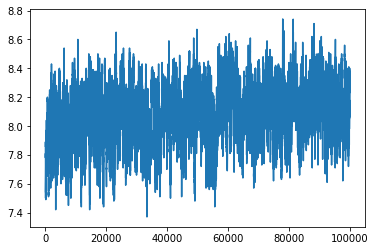

In [148]:
# plt.plot(results[:, 1])
means = torch.tensor(results[:, 1], dtype=torch.float).unfold(0, 100, 1).mean(1).view(-1)
# means = torch.cat((torch.zeros(99), means))
plt.plot(np.arange(100, 100 + len(means)), means.numpy())
plt.show()

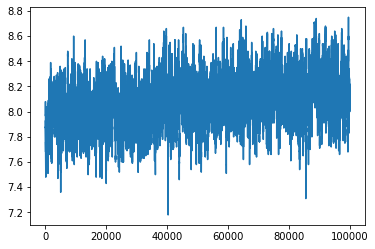

In [149]:
# plt.plot(results[:, -1])
means = torch.tensor(results[:, -1], dtype=torch.float).unfold(0, 100, 1).mean(1).view(-1)
# means = torch.cat((torch.zeros(99), means))
plt.plot(np.arange(100, 100 + len(means)), means.numpy())
plt.show()

In [140]:
wins_basic = results[:, -1] >= LVL_CAP
avg_wins_basic = wins_basic.mean()
avg_wins_basic

0.262

In [126]:
wins_lowest = results[:, -1] >= LVL_CAP
avg_wins_lowest = wins_lowest.mean()
avg_wins_lowest

0.375

In [169]:
window = 1000

wins = torch.tensor(results[:, -1]) >= LVL_CAP
wins = wins.unfold(0, window, 1).sum(1)
wins = wins.type(torch.FloatTensor)

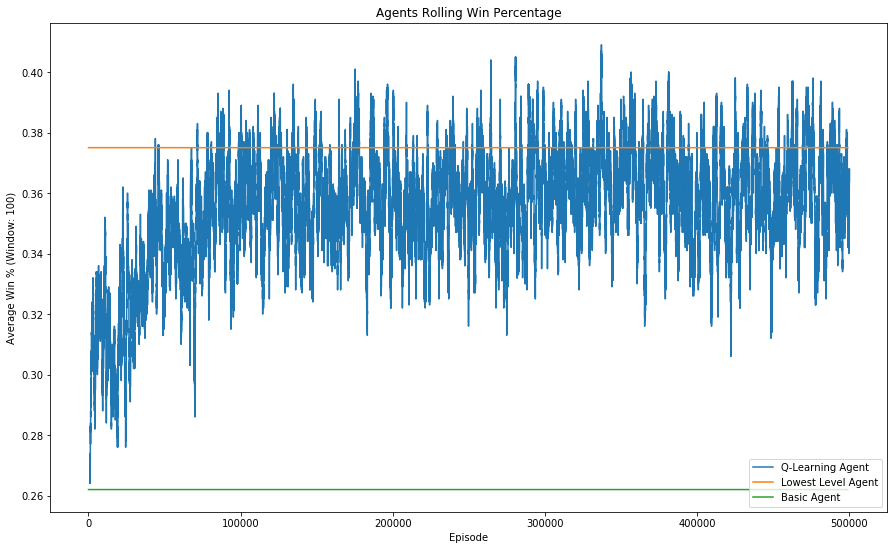

In [170]:
plt.figure(figsize=(15, 9))
plt.plot(np.arange(window, window+len(wins)), (wins / window).numpy())
plt.plot([avg_wins_lowest] * len(wins))
plt.plot([avg_wins_basic] * len(wins))
plt.legend(['Q-Learning Agent', 'Lowest Level Agent', 'Basic Agent'], loc='lower right')
plt.title('Agents Rolling Win Percentage')
plt.xlabel('Episode')
plt.ylabel('Average Win % (Window: 100)')
plt.show()

In [15]:
ff_agents[-1].skill

AttributeError: 'Q_Agent' object has no attribute 'skill'

In [ ]:
final_probs = ff_agents[-1].map_probs(NUM_PLAYERS)
final_probs = final_probs * (1 - ff_agents[-1].skill) / np.sum(final_probs)
final_probs[-1] = ff_agents[-1].skill
final_probs

In [ ]:
skill_levels